
## __Clustering (Unsupervised Learning)__


This problem can be approached through Unsupervised learning  


**Data Source**: https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation

https://www.kaggle.com/yatishbn/uci-turkiye-student-evaluation-data-set

In [13]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import collections
import scipy.cluster.hierarchy as hier
from sklearn.decomposition import PCA
sns.set_style('whitegrid')
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# read csv (comma separated value) into data
df_train = pd.read_csv('data.csv')

In [4]:
type(df_train)

pandas.core.frame.DataFrame

In [8]:
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [9]:
df_train.shape

(5820, 33)

In [ ]:
df_train.size

There are 5820 observations and 33 features 

In [10]:
df_train.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [15]:
# Well know question is : Is there any "NaN" value and length of this data.
# So, lets look at info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

length: 33 (range index)

Features are Integer

No Target variables here. Okey we have some ideas about data but lets look go inside data deeper

In [17]:
df_train.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df_train.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [12]:
df_train.head(10)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


hypothesis generation after each univariate analysis and then bivariate analysis to chekc the trends and variations

In [21]:
df_train.apply(lambda x: len(x.unique()))

instr          3
class         13
nb.repeat      3
attendance     5
difficulty     5
Q1             5
Q2             5
Q3             5
Q4             5
Q5             5
Q6             5
Q7             5
Q8             5
Q9             5
Q10            5
Q11            5
Q12            5
Q13            5
Q14            5
Q15            5
Q16            5
Q17            5
Q18            5
Q19            5
Q20            5
Q21            5
Q22            5
Q23            5
Q24            5
Q25            5
Q26            5
Q27            5
Q28            5
dtype: int64

# Data Visualisation

Univariate analysis

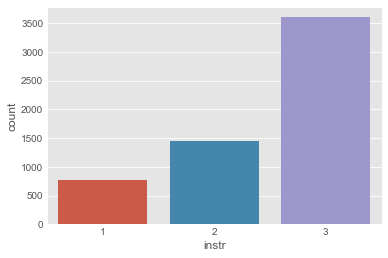

In [41]:
# Instructor
sns.countplot(x='instr', data=df_train)

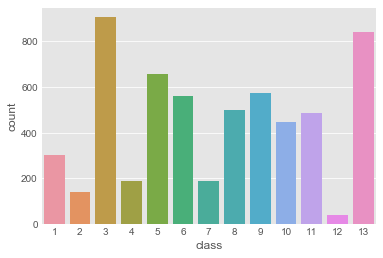

In [27]:
sns.countplot(x='class', data=df_train)

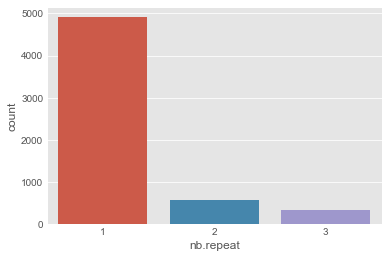

In [28]:
sns.countplot(x='nb.repeat', data=df_train)

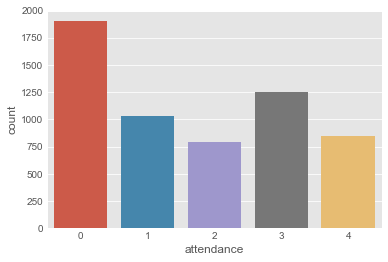

In [29]:
sns.countplot(x='attendance', data=df_train)

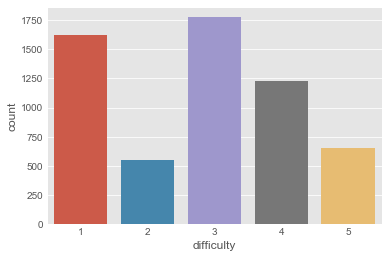

In [30]:
sns.countplot(x='difficulty', data=df_train)

# Bivariate Analysis

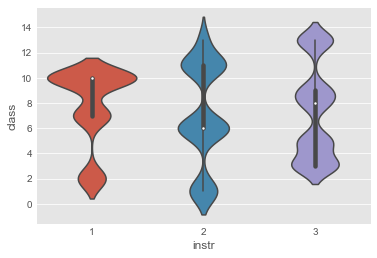

# Multivariate Analysis

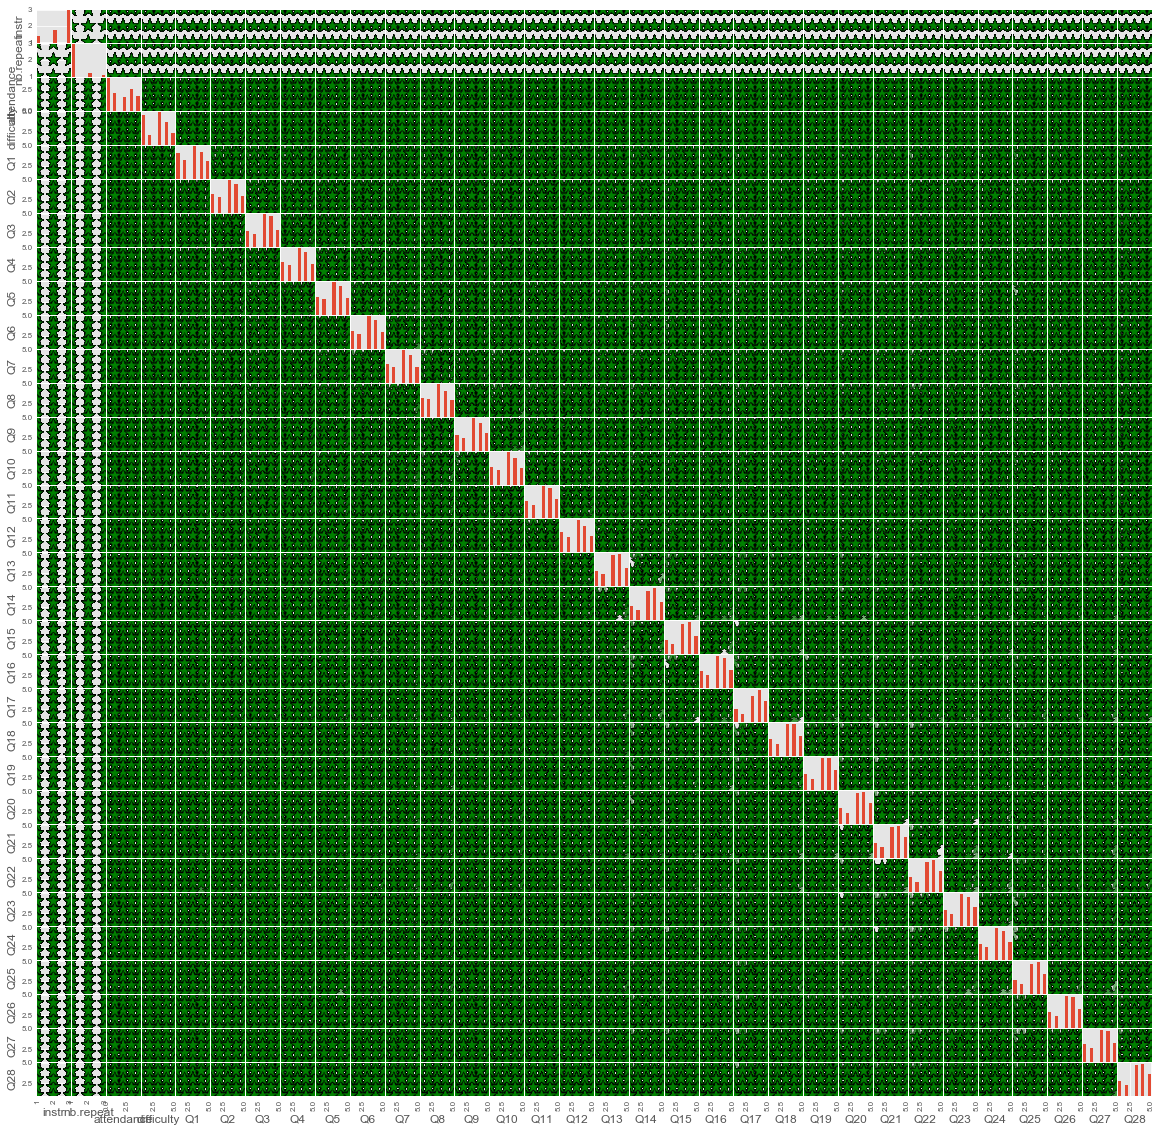

In [23]:
color_list = ['red' if i=='Abnormal' else 'green' for i in df_train.loc[:,'class']]
pd.plotting.scatter_matrix(df_train.loc[:, df_train.columns != 'class'],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

# Model Building 

Clustering


We are lucky that the Q1-Q28 features are Likert-type, which are scaled from 1–5. Hence, the only thing we can fit them to our models directly. Let’s remove all non-question features because we will group the student based on their answer in the survey 

Clustering


In [5]:
X = df_train.iloc[:,5:33]

In [6]:
X.shape

(5820, 28)

In [7]:
X.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


As all the features are having same range & there is no dependency on their units etc. as these are responses of questions only  

we are having 28 features that will be 28 dimensional space 

Standardize the Data for PCA

PCA is effected by scale so you need to scale the features in your data before applying PCA. 
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
which is a requirement for the optimal performance of many machine learning algorithms. 
If you want to see the negative effect not scaling your data can have, 
scikit-learn has a section on the effects of not standardizing your data.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(X)
X_pca.shape

(5820, 2)

Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [9]:
pca.explained_variance_ratio_

array([0.82198145, 0.04515671])

In [11]:
pca.explained_variance_ratio_.sum()

0.8671381678891079

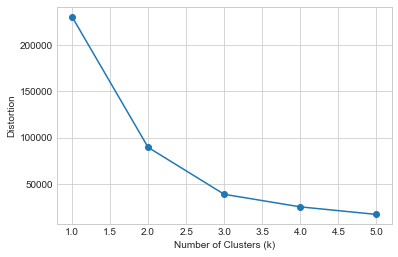

In [15]:
from sklearn.cluster import KMeans

distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)

plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [33]:
# use the best K from elbow method
model = KMeans(
    n_clusters=3,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y = model.predict(X_pca)

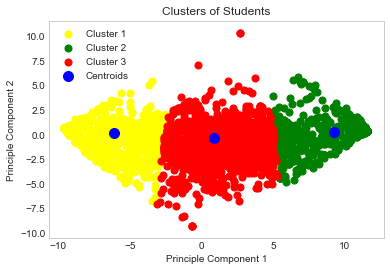

In [34]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Students')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()


In [35]:
# Let’s see what those clusters mean in the context of answers given by those students.
# Let’s check the number of observations belonged to each cluster :
print(collections.Counter(y))

Counter({2: 2358, 0: 2222, 1: 1240})


In [44]:
# Without PCA
model_k = KMeans(
    n_clusters=3,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model_k = model_k.fit(X)

y_final = model_k.predict(X)

Notice that we fit the model with X instead of X_pca.

Let’s compare the number of students in each cluster and check the difference :

In [45]:
from collections import Counter

print('K Means Result : ')
print(collections.Counter(y_final))


K Means Result : 
Counter({2: 2358, 0: 2223, 1: 1239})


Only one observation has different cluster compared to the result with PCA 
(an observation moved from the 1st cluster to the 2nd). 

This mean reducing the data to 2 dimensions by PCA don’t decrease the clustering performance significantly.

In [41]:
# Let’s compute the average answer of each cluster to see the difference between them.

y_final = pd.DataFrame(y_final, columns=['cluster'])

raw_result = pd.concat([X, y_final], axis=1)

y = pd.DataFrame(y, columns=['cluster'])
raw_result_pca = pd.concat([X, y], axis=1)

# raw_result.to_csv('YOUR_PATH/output/raw_result.csv', index=False)
# raw_result_pca.to_csv('YOUR_PATH/output/raw_result_pca.csv', index=False)

mean_by_student_1 = raw_result[raw_result['cluster']==0].iloc[:, 0:28].mean(axis = 1)

mean_by_student_2 = raw_result[raw_result['cluster']==1].iloc[:, 0:28].mean(axis = 1)

mean_by_student_3 = raw_result[raw_result['cluster']==2].iloc[:, 0:28].mean(axis = 1)

print('Mean cluster 1 : ' + str(mean_by_student_1.mean()) + ',STD :' + str(mean_by_student_1.std()))
print('Mean cluster 2 : ' + str(mean_by_student_2.mean()) + ',STD :' + str(mean_by_student_2.std()))
print('Mean cluster 3 : ' + str(mean_by_student_3.mean()) + ',STD :' + str(mean_by_student_3.std()))


Mean cluster 1 : 4.340514748409483,STD :0.4664561373528551
Mean cluster 2 : 1.434394096621699,STD :0.4702797352181298
Mean cluster 3 : 3.0183418150975374,STD :0.30276086397715085


In [39]:
cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')


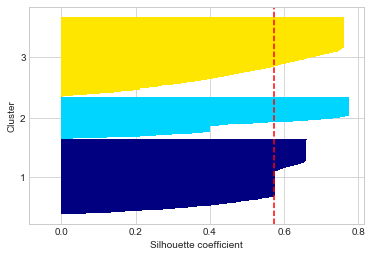

In [77]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()



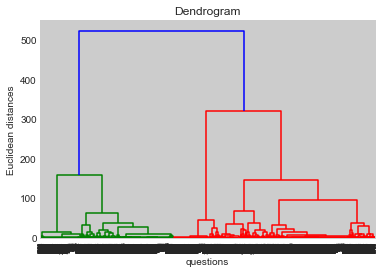

In [87]:
# Making Dendogram
# method = 'ward'
dendrogram = hier.dendrogram(hier.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

Notice that there are two colours : green and red (exclude blue, which is the root). This mean the best k number of clusters according to Ward’s linkage (method = ‘ward’) is two.

The best k number of clusters will be different if we change the linkage algorithm. For example, in the source code I also tried complete linkage which lead to 4 clusters.

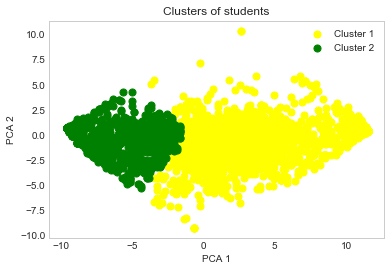

In [88]:
model = AgglomerativeClustering(n_clusters = 2, affinity ='euclidean', linkage ='ward')
y = model.fit_predict(X_pca)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()



In [93]:
print('AgglomerativeClustering w/ Ward Result : ')
print(collections.Counter(y))

cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')


AgglomerativeClustering w/ Ward Result : 
Counter({0: 3502, 1: 2318})


In [96]:
y = pd.DataFrame(y, columns=['cluster'])
raw_result = pd.concat([X, y], axis=1)

# raw_result.to_csv('YOUR_PATH/output/raw_result.csv', index=False)
# raw_result_pca.to_csv('YOUR_PATH/output/raw_result_pca.csv', index=False)

mean_by_student_1 = raw_result[raw_result['cluster']==0].iloc[:, 0:28].mean(axis = 1)

mean_by_student_2 = raw_result[raw_result['cluster']==1].iloc[:, 0:28].mean(axis = 1)

print('Mean of cluster 1 : ' + str(mean_by_student_1.mean()) + ',STD :' + str(mean_by_student_1.std()))
print('Mean of cluster 2 : ' + str(mean_by_student_2.mean()) + ',STD :' + str(mean_by_student_2.std()))


Mean of cluster 1 : 2.442481847107778,STD :0.829040130493381
Mean of cluster 2 : 4.309688154813257,STD :0.4804925917835144


I prefer the result of K-Means with k=3 from Elbow method because having three different groups seems to be more meaningful (Dissatisfied, Neutral, and Satisfied). 

Smaller number of clusters (Dissatisfied/Neutral & Satisfied) from the Ward’s linkage lead to a larger gap between the mean of each cluster.

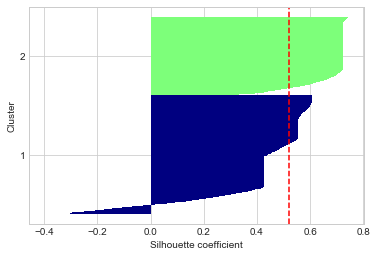

In [95]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

